<a href="https://colab.research.google.com/github/oscarbowie/OESON_Project_3_4/blob/main/Project3-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

#Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB


In [ ]:
df = pd.read_csv('/content/Student_academic.csv')

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Marital status,0,0.0
Curricular units 2nd sem (enrolled),0,0.0
Curricular units 1st sem (enrolled),0,0.0
Curricular units 1st sem (evaluations),0,0.0
Curricular units 1st sem (approved),0,0.0


Dataset has no missing data, so no need for handling.

In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


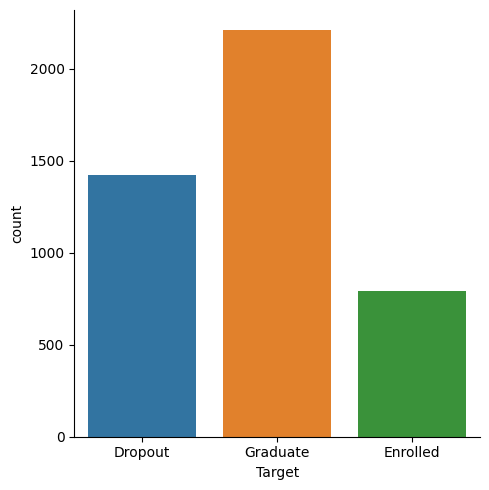

In [ ]:
sns.catplot(data=df, x='Target', kind='count')

Within the target variable, around half the data falls within the Graduate category with the remainder falling within Enrolled and Dropout categories.

In [ ]:
corr_matrix=df.corr()
corr_matrix

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.224855,-0.125854,0.018925,-0.274939,0.120925,-0.020722,0.185522,0.128326,0.069734,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.224855,1.000000,-0.246497,-0.085116,-0.268616,0.433028,-0.001360,0.092867,0.072798,0.033489,...,0.040255,0.228973,0.127461,0.164992,-0.065203,-0.104424,0.042009,0.091567,-0.019613,-0.014563
Application order,-0.125854,-0.246497,1.000000,0.118928,0.158657,-0.199029,-0.029385,-0.061719,-0.049936,-0.046591,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.018925,-0.085116,0.118928,1.000000,-0.070232,-0.158382,-0.004761,0.058909,0.045659,0.029672,...,-0.060483,-0.120390,0.185879,0.049236,0.120000,0.178997,-0.013984,-0.050116,0.028775,-0.012518
Daytime/evening attendance,-0.274939,-0.268616,0.158657,-0.070232,1.000000,-0.103022,0.024433,-0.195346,-0.137769,-0.037986,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.120925,0.433028,-0.199029,-0.158382,-0.103022,1.000000,-0.038997,0.018868,0.013152,0.006190,...,0.018276,0.138463,0.056450,0.101501,-0.037265,-0.038765,0.024186,0.096914,-0.056388,0.053968
Nacionality,-0.020722,-0.001360,-0.029385,-0.004761,0.024433,-0.038997,1.000000,-0.043847,-0.088892,0.044123,...,0.026203,-0.000747,-0.020103,-0.018023,-0.014142,-0.005409,-0.012052,-0.006013,-0.012331,0.044563
Mother's qualification,0.185522,0.092867,-0.061719,0.058909,-0.195346,0.018868,-0.043847,1.000000,0.524529,0.295178,...,0.003293,0.036986,0.033070,0.018874,-0.013161,-0.028472,0.020364,-0.106107,0.056653,-0.079664
Father's qualification,0.128326,0.072798,-0.049936,0.045659,-0.137769,0.013152,-0.088892,0.524529,1.000000,0.207067,...,-0.017785,0.041695,0.023635,0.009471,0.006052,-0.006508,-0.008493,-0.075417,0.056661,-0.070200
Mother's occupation,0.069734,0.033489,-0.046591,0.029672,-0.037986,0.006190,0.044123,0.295178,0.207067,1.000000,...,-0.012569,-0.002057,0.009287,0.011546,0.022309,0.035230,-0.004903,-0.011772,0.015014,0.091880


However most of the data is categorical numeric.

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

c = ['set','fold','metric','Dropout',	'Enrolled',	'Graduate',	'accuracy',	'macro avg','weighted avg',	]
results = pd.DataFrame()

Random Forest Unadjusted

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
  random_forest.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = random_forest.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index],
                      Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = random_forest.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index],
                      Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
random_forest_metrics = test_metrics
test_metrics['model'] = 'random_forest'
test_metrics['data'] = 'original'
results = pd.concat([results,test_metrics])


Gaussian unadjusted data.

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  gaussian = GaussianNB()
  gaussian.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = gaussian.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = gaussian.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
gaussian_metrics = test_metrics
test_metrics['model'] = 'gaussian'
test_metrics['data'] = 'original'
results = pd.concat([results,test_metrics])



Decision Tree Unadjusted

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  decisiontree=DecisionTreeClassifier()
  decisiontree.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = decisiontree.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = decisiontree.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
decisiontree_metrics = test_metrics
test_metrics['model'] = 'decisiontree'
test_metrics['data'] = 'original'
results = pd.concat([results,test_metrics])

Support Vector 1000 iterations Unadjusted

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)
warnings.filterwarnings('ignore')

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  svc=LinearSVC(max_iter = 1000)
  svc.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = svc.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = svc.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
svc_metrics = test_metrics
test_metrics['model'] = 'svc_1000'
test_metrics['data'] = 'original'
results = pd.concat([results,test_metrics])

Support Vector 5000 iterations Unadjusted

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)
warnings.filterwarnings('ignore')

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  svc=LinearSVC(max_iter = 5000)
  svc.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = svc.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = svc.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
svc_metrics = test_metrics
test_metrics['model'] = 'svc_5000'
test_metrics['data'] = 'original'
results = pd.concat([results,test_metrics])

Logarithmic Regression Unadjusted


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)
warnings.filterwarnings('ignore')

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  logreg = LogisticRegression()
  logreg.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = logreg.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = logreg.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
svc_metrics = test_metrics
test_metrics['model'] = 'logreg'
test_metrics['data'] = 'original'
results = pd.concat([results,test_metrics])

PCA2

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

pca = PCA(n_components=2)
X = pd.DataFrame(pca.fit_transform(X))

Random Forest PCA2

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
  random_forest.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = random_forest.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = random_forest.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
random_forest_metrics = test_metrics
test_metrics['model'] = 'random_forest'
test_metrics['data'] = 'pca_2'
results = pd.concat([results,test_metrics])

Gaussian PCA2

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  gaussian = GaussianNB()
  gaussian.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = gaussian.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = gaussian.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
gaussian_metrics = test_metrics
test_metrics['model'] = 'gaussian'
test_metrics['data'] = 'pca_2'
results = pd.concat([results,test_metrics])



Decision Tree PCA2

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  decisiontree=DecisionTreeClassifier()
  decisiontree.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = decisiontree.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = decisiontree.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
decisiontree_metrics = test_metrics
test_metrics['model'] = 'decisiontree'
test_metrics['data'] = 'pca_2'
results = pd.concat([results,test_metrics])

Support Vector 1000 iterations PCA2

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)
warnings.filterwarnings('ignore')

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  svc=LinearSVC(max_iter = 1000)
  svc.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = svc.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = svc.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
svc_metrics = test_metrics
test_metrics['model'] = 'svc_1000'
test_metrics['data'] = 'pca_2'
results = pd.concat([results,test_metrics])

Support Vector 5000 iterations PCA2

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)
warnings.filterwarnings('ignore')

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  svc=LinearSVC(max_iter = 5000)
  svc.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = svc.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = svc.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
svc_metrics = test_metrics
test_metrics['model'] = 'svc_5000'
test_metrics['data'] = 'pca_2'
results = pd.concat([results,test_metrics])

Logarithmic Regression PCA2

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)
warnings.filterwarnings('ignore')

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  logreg = LogisticRegression()
  logreg.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = logreg.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = logreg.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
svc_metrics = test_metrics
test_metrics['model'] = 'logreg'
test_metrics['data'] = 'pca_2'
results = pd.concat([results,test_metrics])

PCA 5

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

pca = PCA(n_components=5)
X = pd.DataFrame(pca.fit_transform(X))

Random Forest PCA5

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
  random_forest.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = random_forest.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = random_forest.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
random_forest_metrics = test_metrics
test_metrics['model'] = 'random_forest'
test_metrics['data'] = 'pca_5'
results = pd.concat([results,test_metrics])

Gaussian PCA5

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  gaussian = GaussianNB()
  gaussian.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = gaussian.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = gaussian.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
gaussian_metrics = test_metrics
test_metrics['model'] = 'gaussian'
test_metrics['data'] = 'pca_5'
results = pd.concat([results,test_metrics])



Decision Tree PCA5

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  decisiontree=DecisionTreeClassifier()
  decisiontree.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = decisiontree.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = decisiontree.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
decisiontree_metrics = test_metrics
test_metrics['model'] = 'decisiontree'
test_metrics['data'] = 'pca_5'
results = pd.concat([results,test_metrics])

Support Vector 1000 iterations PCA5

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)
warnings.filterwarnings('ignore')

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  svc=LinearSVC(max_iter = 1000)
  svc.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = svc.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = svc.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
svc_metrics = test_metrics
test_metrics['model'] = 'svc_1000'
test_metrics['data'] = 'pca_5'
results = pd.concat([results,test_metrics])

Support Vector 5000 iterations PCA5

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)
warnings.filterwarnings('ignore')

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  svc=LinearSVC(max_iter = 5000)
  svc.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = svc.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = svc.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
svc_metrics = test_metrics
test_metrics['model'] = 'svc_5000'
test_metrics['data'] = 'pca_5'
results = pd.concat([results,test_metrics])

Logarithmic Regression PCA5

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X)
warnings.filterwarnings('ignore')

test_metrics = pd.DataFrame(columns=c)
for i, (train_index, test_index) in enumerate(kf.split(X)):
  logreg = LogisticRegression()
  logreg.fit(X.iloc[train_index], y.iloc[train_index,])

  #train data results
  Y_prediction_train = logreg.predict(X.iloc[train_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[train_index], Y_prediction_train, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'train'
  test_metrics = pd.concat([test_metrics,d])

  #test data results
  Y_prediction_test = logreg.predict(X.iloc[test_index])
  d = pd.DataFrame(metrics.classification_report(y.iloc[test_index], Y_prediction_test, digits=3, output_dict=True))
  d = d.reset_index().rename(columns={'index':'metric'})
  d['fold'] = i
  d['set'] = 'test'
  test_metrics = pd.concat([test_metrics,d])

#storing results
svc_metrics = test_metrics
test_metrics['model'] = 'logreg'
test_metrics['data'] = 'pca_5'
results = pd.concat([results,test_metrics])

In [ ]:
r = results.groupby(['model','data', 'set',]).mean('accuracy').drop(['Dropout', 'Enrolled', 'Graduate', 'macro avg', 'weighted avg'], axis=1)
r

accuracy
model         data     set            
decisiontree  original test   0.676757
                       train  1.000000
              pca_2    test   0.547922
                       train  1.000000
              pca_5    test   0.557189
                       train  1.000000
gaussian      original test   0.687835
                       train  0.691964
              pca_2    test   0.639012
                       train  0.639692
              pca_5    test   0.632454
                       train  0.633194
logreg        original test   0.768308
                       train  0.777012
              pca_2    test   0.647829
                       train  0.647095
              pca_5    test   0.646924
                       train  0.647321
random_forest original test   0.778028
                       train  1.000000
              pca_2    test   0.614830
                       train  1.000000
              pca_5    test   0.637431
                       train  1.000000
svc_1000      original test   0.686040
                       train  0.697216
              pca_2    test   0.643081
                       train  0.646022
              pca_5    test   0.645341
                       train  0.641727
svc_5000      original test   0.745478
                       train  0.752769
              pca_2    test   0.644889
                       train  0.645230
              pca_5    test   0.644663
                       train  0.644496

In [ ]:
r = r.reset_index()
r[r['set']=='test'].sort_values(by = 'accuracy', ascending=False)

,model,data,set,accuracy
18,random_forest,original,test,0.778028
12,logreg,original,test,0.768308
30,svc_5000,original,test,0.745478
6,gaussian,original,test,0.687835
24,svc_1000,original,test,0.686040
0,decisiontree,original,test,0.676757
14,logreg,pca_2,test,0.647829
16,logreg,pca_5,test,0.646924
28,svc_1000,pca_5,test,0.645341
32,svc_5000,pca_2,test,0.644889


<Axes: xlabel='data', ylabel='accuracy'>

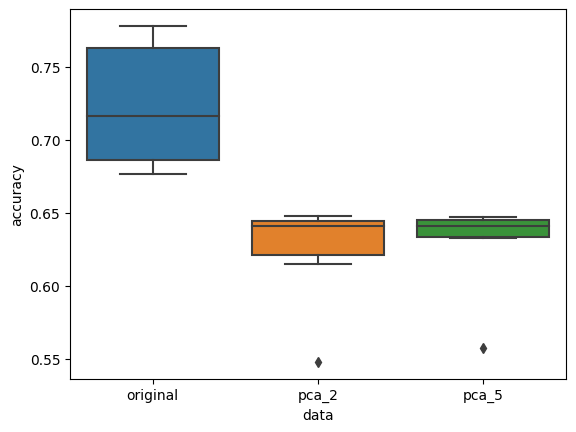

In [ ]:
r = r[r['set']=='test'].sort_values(by = 'accuracy', ascending=False)
sns.boxplot(data=r, x='data', y='accuracy')

According to the 5-fold cross validation data, the original dataset over all the models provided the greatest accuracy by a large margin, followed by 2 Principal Component, with a larger variance, but with an average higher than 5 Principal Component, which had a smaller variance, but a slightly lower average accuracy.

<Axes: xlabel='model', ylabel='accuracy'>

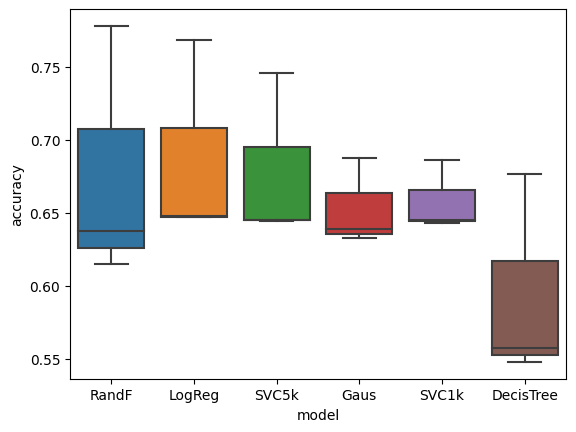

In [ ]:
r= r.replace(['random_forest', 'logreg', 'svc_5000', 'gaussian', 'svc_1000', 'decisiontree'],['RandF', 'LogReg', 'SVC5k', 'Gaus', 'SVC1k','DecisTree'])
sns.boxplot(data=r, x='model', y='accuracy')

Comparison between the accuracies produced by the models over all different data types found that Random Forest had the greatest variance in accuracy, however high variance is likely due to the lower performance random forest has on the PCA datasets, and performs best on the original dataset as seen below.
Decision Tree was found to be the worst model for this data, with Support Vector 5000 iterations and 1000 iterations having a small difference, Gaussian performing second worst, and Logarithmic regression performing second best, with a higher average than Random Forest on adjusted data.

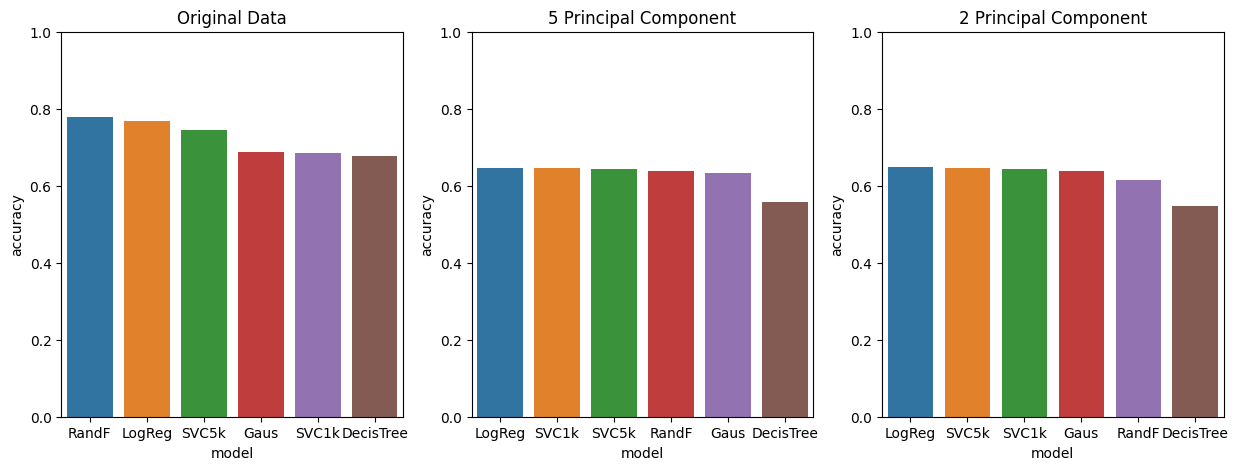

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

sns.barplot(data=r[r['data']=='original'],ax=ax[0], x='model', y='accuracy').set_ylim(0, 1)
sns.barplot(data=r[r['data']=='pca_5'],ax=ax[1], x='model', y='accuracy').set_ylim(0, 1)
sns.barplot(data=r[r['data']=='pca_2'],ax=ax[2], x='model', y='accuracy').set_ylim(0, 1)
ax[0].title.set_text('Original Data')
ax[1].title.set_text('5 Principal Component')
ax[2].title.set_text('2 Principal Component')


Here we see again that the highest ranking model was random forest on the unadjusted dataset with a accuracy of ~0.8. For PCA altered data, the logarithmic regression and support vector machines out performed the random forest model, however both of these on the original data performed better than their PCA counterparts, concluding that for this data, the greatest accuracy is achieved using a random forest model on unadjusted data.